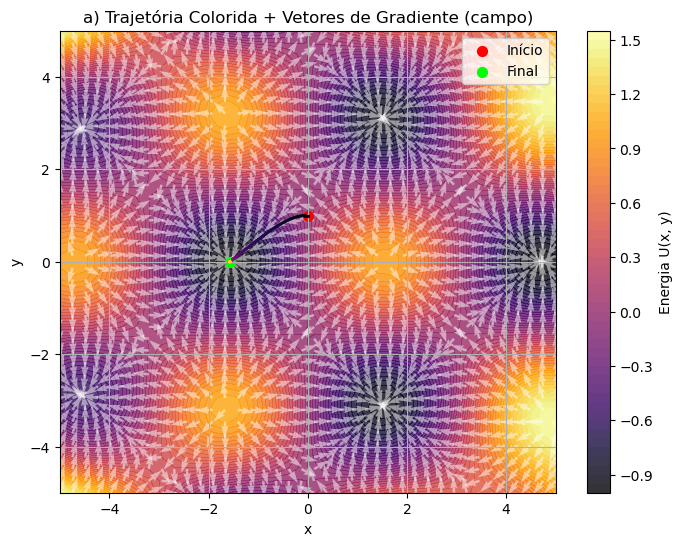

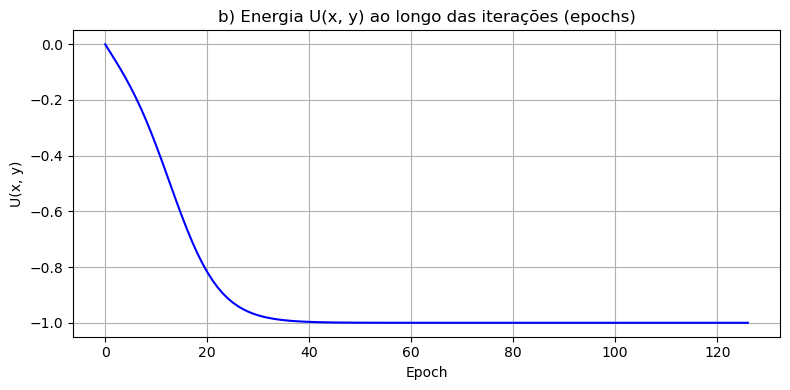

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Função e gradiente
def U(x, y):
    return np.sin(x) * np.cos(y) + 2 * (x * y)**2 / 1000

def grad_U(x, y):
    dU_dx = np.cos(x) * np.cos(y) + 4 * x * y**2 / 1000
    dU_dy = -np.sin(x) * np.sin(y) + 4 * y * x**2 / 1000
    return np.array([dU_dx, dU_dy])

# Gradiente descendente em 2D
def gradient_descent_2D(xy0, lr=0.1, max_iter=1000, tol=1e-6):
    xy = np.array(xy0)
    trajectory = [xy.copy()]
    energies = [U(xy[0], xy[1])]

    for _ in range(max_iter):
        grad = grad_U(xy[0], xy[1])
        new_xy = xy - lr * grad
        if np.linalg.norm(new_xy - xy) < tol:
            break
        xy = new_xy
        trajectory.append(xy.copy())
        energies.append(U(xy[0], xy[1]))

    return np.array(trajectory), energies

# ====== Parâmetros ======
x0, y0 = 0, 1
lr = 0.1
trajectory, energies = gradient_descent_2D([x0, y0], lr=lr)

# ====== Preparar malha e vetores de gradiente ======
x_vals = np.linspace(-5, 5, 40)
y_vals = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

# Gradientes para setas
U_dx, U_dy = grad_U(X, Y)
U_norm = np.sqrt(U_dx**2 + U_dy**2)
U_dx /= U_norm + 1e-8  # normalizar
U_dy /= U_norm + 1e-8


# ====== a) Gráfico com trajetória colorida e setas ======
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='inferno', alpha=0.8)

# Vetores de gradiente (campo vetorial)
plt.quiver(X, Y, -U_dx, -U_dy, color='white', alpha=0.5, scale=30, width=0.005)

# Colorir trajetória
points = trajectory
colors = np.linspace(0, 1, len(points))
for i in range(len(points) - 1):
    plt.plot(points[i:i+2,0], points[i:i+2,1], color=plt.cm.inferno(colors[i]), linewidth=2)

# Início e fim
plt.scatter(points[0,0], points[0,1], color='red', label='Início', s=50)
plt.scatter(points[-1,0], points[-1,1], color='lime', label='Final', s=50)

plt.title("a) Trajetória Colorida + Vetores de Gradiente (campo)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.colorbar(contour, label='Energia U(x, y)', )
plt.grid(True)

# ====== b) Energia vs Epoch ======
plt.figure(figsize=(8, 4))
plt.plot(energies, color='blue')
plt.title("b) Energia U(x, y) ao longo das iterações (epochs)")
plt.xlabel("Epoch")
plt.ylabel("U(x, y)")
plt.grid(True)

plt.tight_layout()
plt.show()
